# Individual Project

## Thomas Henry - MBD 2020/2021

### Main Goals:
- Create a clean dataset
- Compute a complex linear regression to find relationships between the independent and dependent variables
- Have a strong score when predicting the housing market and comparing that score to the actual prices
- Find which factors are affecting the market the most

Area analyzed: Southern Europe
- Italy
- Greece
- Portugal
- Spain
- Slovenia
    
Data Source: https://stats.oecd.org

## Cleaning Data

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import the real house price table
housing = pd.read_csv('./project_data/Housing_Market_data_Southern_Europe.csv')

#Import the population table
population = pd.read_csv('./project_data/Population_Data_Southern_Europe.csv')

#import the financials table
financial = pd.read_csv('./project_data/Financial_Data_Southern_Europe.csv')

In [3]:
#Obtain the first five rows of the housing dataframe to see what it looks like
housing.head()

,COU,Country,IND,Indicator,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,ITA,Italy,HPI,"Nominal house price indices, s.a.",2005,2005,IDX,Index,0,Units,NaN,NaN,108.225783,NaN,NaN
1,ITA,Italy,HPI,"Nominal house price indices, s.a.",2005-Q1,Q1-2005,IDX,Index,0,Units,NaN,NaN,105.655759,NaN,NaN
2,ITA,Italy,HPI,"Nominal house price indices, s.a.",2005-Q2,Q2-2005,IDX,Index,0,Units,NaN,NaN,107.343303,NaN,NaN
3,ITA,Italy,HPI,"Nominal house price indices, s.a.",2005-Q3,Q3-2005,IDX,Index,0,Units,NaN,NaN,108.973619,NaN,NaN
4,ITA,Italy,HPI,"Nominal house price indices, s.a.",2005-Q4,Q4-2005,IDX,Index,0,Units,NaN,NaN,110.930453,NaN,NaN


In [4]:
#Determine the number of rows and columns
housing.shape

(2506, 15)

In [5]:
#Understand the data, look for missing values in order to clean the data
housing.info

<bound method DataFrame.info of       COU Country      IND                          Indicator     TIME  \
0     ITA   Italy      HPI  Nominal house price indices, s.a.     2005   
1     ITA   Italy      HPI  Nominal house price indices, s.a.  2005-Q1   
2     ITA   Italy      HPI  Nominal house price indices, s.a.  2005-Q2   
3     ITA   Italy      HPI  Nominal house price indices, s.a.  2005-Q3   
4     ITA   Italy      HPI  Nominal house price indices, s.a.  2005-Q4   
...   ...     ...      ...                                ...      ...   
2501  ESP   Spain  HPI_YDH              Price to income ratio  2019-Q2   
2502  ESP   Spain  HPI_YDH              Price to income ratio  2019-Q3   
2503  ESP   Spain  HPI_YDH              Price to income ratio  2019-Q4   
2504  ESP   Spain  HPI_YDH              Price to income ratio  2020-Q1   
2505  ESP   Spain  HPI_YDH              Price to income ratio  2020-Q2   

         Time Unit Code   Unit  PowerCode Code PowerCode  \
0        2005      

In [6]:
#Check for missing values
housing.isna().sum().sum()

10024

In [7]:
#Delete all the columns that are containing solely missing values)
housing_filtered = housing.dropna(axis = 1, how = 'all')

In [8]:
#Double-check to see if any missing values are left
housing_filtered.isna().sum().sum()

0

In [9]:
#Delete all rows that contain a "Q" in the Time to only have information per year and not per quarters

housing_filtered = housing_filtered[~housing_filtered.Time.str.contains("Q")]

housing_filtered.head()

,COU,Country,IND,Indicator,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Value
0,ITA,Italy,HPI,"Nominal house price indices, s.a.",2005,2005,IDX,Index,0,Units,108.225783
5,ITA,Italy,HPI,"Nominal house price indices, s.a.",2006,2006,IDX,Index,0,Units,115.191197
10,ITA,Italy,HPI,"Nominal house price indices, s.a.",2007,2007,IDX,Index,0,Units,121.130252
15,ITA,Italy,HPI,"Nominal house price indices, s.a.",2008,2008,IDX,Index,0,Units,123.177099
20,ITA,Italy,HPI,"Nominal house price indices, s.a.",2009,2009,IDX,Index,0,Units,118.646535


In [10]:
#Drop all unnecessary columns

housing_filtered = housing_filtered.drop(['COU','TIME','Unit Code','Unit','PowerCode Code','PowerCode'], axis = 1)

In [11]:
#Get all remaining columns
housing_filtered['Indicator'].unique()

array(['Nominal house price indices, s.a.', 'Rent prices, s.a.',
       'Price to rent ratio', 'Real house price indices, s.a.',
       'Standardised price-rent ratio', 'Price to income ratio',
       'Standardised price-income ratio'], dtype=object)

##### End Product

In [12]:
#Creation of a first independent variable using the Real House Prices Indices for the analysis
housing_real_house_prices = housing_filtered[housing_filtered['Indicator'] == 'Real house price indices, s.a.']

housing_real_house_prices.head()

,Country,IND,Indicator,Time,Value
299,Spain,RHP,"Real house price indices, s.a.",2005,140.883992
304,Spain,RHP,"Real house price indices, s.a.",2006,154.591433
309,Spain,RHP,"Real house price indices, s.a.",2007,164.245886
314,Spain,RHP,"Real house price indices, s.a.",2008,156.297547
319,Spain,RHP,"Real house price indices, s.a.",2009,147.370284


##### Visualization of the independent variable "Real House Prices" per country

In [14]:
#Interactive Visualization of the first independent variable "Real House Prices"

import altair as alt

input_dropdown = alt.binding_select(options=['Greece','Italy','Portugal','Slovenia','Spain'])
selection = alt.selection_single(fields=['Country'], bind=input_dropdown, name='Country of ')
color = alt.condition(selection,
                    alt.Color('Origin:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(housing_real_house_prices).mark_line().encode(
    x='Time',
    y='Value',
    color='Country:N',
    tooltip='Country:N'
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=800,
    height=600
)


alt.Chart(...)

In [14]:
#Creation of a second independent variable using the Rent prices, s.a.
housing_rent_prices = housing_filtered[housing_filtered.Indicator == 'Rent prices, s.a.']

housing_rent_prices.head()

,Country,IND,Indicator,Time,Value
77,Greece,RPI,"Rent prices, s.a.",2005,102.331967
82,Greece,RPI,"Rent prices, s.a.",2006,106.798942
87,Greece,RPI,"Rent prices, s.a.",2007,111.657667
92,Greece,RPI,"Rent prices, s.a.",2008,115.997766
97,Greece,RPI,"Rent prices, s.a.",2009,120.196566


##### Visualization of the independent variable "Rent Prices" per country

In [15]:
# Visualization of the independent variable "Rent Prices" per country
input_dropdown = alt.binding_select(options=['Greece','Italy','Portugal','Slovenia','Spain'])
selection = alt.selection_single(fields=['Country'], bind=input_dropdown, name='Country of ')
color = alt.condition(selection,
                    alt.Color('Origin:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(housing_rent_prices).mark_line().encode(
    x='Time',
    y='Value',
    color='Country:N',
    tooltip='Country:N'
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=800,
    height=600
)

alt.Chart(...)

##### Filter per Country

In [16]:
#Create a new dataframe filtered by Country
housing_italy = housing_filtered[housing_filtered['Country'] == 'Italy']
housing_greece = housing_filtered[housing_filtered['Country'] == 'Greece']
housing_portugal = housing_filtered[housing_filtered['Country'] == 'Portugal']
housing_spain = housing_filtered[housing_filtered['Country'] == 'Spain']
housing_slovenia = housing_filtered[housing_filtered['Country'] == 'Slovenia']

### Housing KPIs Tables

### Italy

In [17]:
#Retrieve first 5 columns of the dataframe
housing_italy.head()

,Country,IND,Indicator,Time,Value
0,Italy,HPI,"Nominal house price indices, s.a.",2005,108.225783
5,Italy,HPI,"Nominal house price indices, s.a.",2006,115.191197
10,Italy,HPI,"Nominal house price indices, s.a.",2007,121.130252
15,Italy,HPI,"Nominal house price indices, s.a.",2008,123.177099
20,Italy,HPI,"Nominal house price indices, s.a.",2009,118.646535


In [18]:
#Get insight on the structure and number of missing values
housing_italy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 2278
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    105 non-null    object 
 1   IND        105 non-null    object 
 2   Indicator  105 non-null    object 
 3   Time       105 non-null    object 
 4   Value      105 non-null    float64
dtypes: float64(1), object(4)
memory usage: 4.9+ KB


In [19]:
#Retrieve all column names to copy them into the next visualization
housing_italy['Indicator'].unique()

array(['Nominal house price indices, s.a.',
       'Standardised price-rent ratio', 'Price to income ratio',
       'Rent prices, s.a.', 'Price to rent ratio',
       'Standardised price-income ratio',
       'Real house price indices, s.a.'], dtype=object)

##### Visualization of all housing parameters for Italy

In [20]:
#Visualization of all housing parameters for Italy
input_dropdown = alt.binding_select(options=['Nominal house price indices, s.a.','Standardised price-rent ratio', 'Price to income ratio','Rent prices, s.a.','Price to rent ratio','Standardised price-income ratio','Real house price indices, s.a.'])
selection = alt.selection_single(fields=['Indicator'], bind=input_dropdown, name='Indicator')
color = alt.condition(selection,
                    alt.Color('Indicator:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(housing_italy).mark_line().encode(
    x='Time',
    y='Value',
    color='Indicator:N',
    tooltip='Indicator:N'
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=700,
    height=600
)

alt.Chart(...)

### Greece

In [21]:
#Retrieve first 5 columns of the dataframe
housing_greece.head()

,Country,IND,Indicator,Time,Value
77,Greece,RPI,"Rent prices, s.a.",2005,102.331967
82,Greece,RPI,"Rent prices, s.a.",2006,106.798942
87,Greece,RPI,"Rent prices, s.a.",2007,111.657667
92,Greece,RPI,"Rent prices, s.a.",2008,115.997766
97,Greece,RPI,"Rent prices, s.a.",2009,120.196566


In [22]:
housing_greece.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 77 to 2355
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    105 non-null    object 
 1   IND        105 non-null    object 
 2   Indicator  105 non-null    object 
 3   Time       105 non-null    object 
 4   Value      105 non-null    float64
dtypes: float64(1), object(4)
memory usage: 4.9+ KB


In [23]:
#Visualization of all housing parameters for Greece
input_dropdown = alt.binding_select(options=['Nominal house price indices, s.a.','Standardised price-rent ratio', 'Price to income ratio','Rent prices, s.a.','Price to rent ratio','Standardised price-income ratio','Real house price indices, s.a.'])
selection = alt.selection_single(fields=['Indicator'], bind=input_dropdown, name='Indicator')
color = alt.condition(selection,
                    alt.Color('Indicator:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(housing_greece).mark_line().encode(
    x='Time',
    y='Value',
    color='Indicator:N',
    tooltip='Indicator:N'
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=700,
    height=600
)

alt.Chart(...)

### Portugal

In [24]:
#Retrieve first 5 columns of the dataframe
housing_portugal.head()

,Country,IND,Indicator,Time,Value
222,Portugal,HPI_RPI,Price to rent ratio,2005,138.466983
227,Portugal,HPI_RPI,Price to rent ratio,2006,137.894229
232,Portugal,HPI_RPI,Price to rent ratio,2007,134.910487
237,Portugal,HPI_RPI,Price to rent ratio,2008,122.694365
242,Portugal,HPI_RPI,Price to rent ratio,2009,119.710229


In [25]:
housing_portugal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 222 to 2046
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    105 non-null    object 
 1   IND        105 non-null    object 
 2   Indicator  105 non-null    object 
 3   Time       105 non-null    object 
 4   Value      105 non-null    float64
dtypes: float64(1), object(4)
memory usage: 4.9+ KB


In [26]:
#Visualization of all housing parameters for Portugal
input_dropdown = alt.binding_select(options=['Nominal house price indices, s.a.','Standardised price-rent ratio', 'Price to income ratio','Rent prices, s.a.','Price to rent ratio','Standardised price-income ratio','Real house price indices, s.a.'])
selection = alt.selection_single(fields=['Indicator'], bind=input_dropdown, name='Indicator')
color = alt.condition(selection,
                    alt.Color('Indicator:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(housing_portugal).mark_line().encode(
    x='Time',
    y='Value',
    color='Indicator:N',
    tooltip='Indicator:N'
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=700,
    height=600
)

alt.Chart(...)

In [27]:
# Following this part, all the code related to the housing indicators are the same as above and thus, won't appear anymore.

### Spain

In [28]:
#Retrieve first 5 columns of the dataframe
housing_spain.head()

,Country,IND,Indicator,Time,Value
299,Spain,RHP,"Real house price indices, s.a.",2005,140.883992
304,Spain,RHP,"Real house price indices, s.a.",2006,154.591433
309,Spain,RHP,"Real house price indices, s.a.",2007,164.245886
314,Spain,RHP,"Real house price indices, s.a.",2008,156.297547
319,Spain,RHP,"Real house price indices, s.a.",2009,147.370284


In [29]:
housing_spain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 299 to 2499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    105 non-null    object 
 1   IND        105 non-null    object 
 2   Indicator  105 non-null    object 
 3   Time       105 non-null    object 
 4   Value      105 non-null    float64
dtypes: float64(1), object(4)
memory usage: 4.9+ KB


In [30]:
#Visualization of all housing parameters for Spain
input_dropdown = alt.binding_select(options=['Nominal house price indices, s.a.','Standardised price-rent ratio', 'Price to income ratio','Rent prices, s.a.','Price to rent ratio','Standardised price-income ratio','Real house price indices, s.a.'])
selection = alt.selection_single(fields=['Indicator'], bind=input_dropdown, name='Indicator')
color = alt.condition(selection,
                    alt.Color('Indicator:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(housing_spain).mark_line().encode(
    x='Time',
    y='Value',
    color='Indicator:N',
    tooltip='Indicator:N'
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=700,
    height=600
)

alt.Chart(...)

### Slovenia

In [31]:
housing_slovenia[housing_slovenia.Time == str(2005)]

,Country,IND,Indicator,Time,Value
1069,Slovenia,RPI,"Rent prices, s.a.",2005,92.508256


In [32]:
#Change the Time column into a numeric type in order to sort it later on
housing_slovenia = housing_slovenia.astype({"Time": int}) 

housing_slovenia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 155 to 2422
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    67 non-null     object 
 1   IND        67 non-null     object 
 2   Indicator  67 non-null     object 
 3   Time       67 non-null     int64  
 4   Value      67 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.1+ KB


In [33]:
#Sort the years in ascending order to make sure that the graph appears correctly
housing_slovenia.sort_values(by=['Time'], inplace=True)

In [34]:
#Visualization of all housing parameters for Slovenia
input_dropdown = alt.binding_select(options=['Nominal house price indices, s.a.','Standardised price-rent ratio', 'Price to income ratio','Rent prices, s.a.','Price to rent ratio','Standardised price-income ratio','Real house price indices, s.a.'])
selection = alt.selection_single(fields=['Indicator'], bind=input_dropdown, name='Indicator')
color = alt.condition(selection,
                    alt.Color('Indicator:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(housing_slovenia).mark_line().encode(
    x='Time',
    y='Value',
    color='Indicator:N',
    tooltip='Indicator:N'
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=700,
    height=600
)

alt.Chart(...)

### Financial Data Cleaning

In [35]:
#information about the dataset
financial.head()

,LOCATION,Country,VARIABLE,Variable,EDITION,Edition,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,GRC,Greece,CQ_ISKV,"Change in inventories, contributions to change...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2005,2005,PC,Percentage,0,Units,2010.0,2010.0,0.205935,NaN,NaN
1,GRC,Greece,CQ_ISKV,"Change in inventories, contributions to change...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2006,2006,PC,Percentage,0,Units,2010.0,2010.0,1.238916,NaN,NaN
2,GRC,Greece,CQ_ISKV,"Change in inventories, contributions to change...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2007,2007,PC,Percentage,0,Units,2010.0,2010.0,-1.532022,NaN,NaN
3,GRC,Greece,CQ_ISKV,"Change in inventories, contributions to change...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2008,2008,PC,Percentage,0,Units,2010.0,2010.0,-0.628778,NaN,NaN
4,GRC,Greece,CQ_ISKV,"Change in inventories, contributions to change...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2009,2009,PC,Percentage,0,Units,2010.0,2010.0,-3.271774,NaN,NaN


In [36]:
#Check number of rows and columns
financial.shape

(3584, 19)

In [37]:
#Retrieve information to understand the dataframe and check for missing values
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3584 non-null   object 
 1   Country                3584 non-null   object 
 2   VARIABLE               3584 non-null   object 
 3   Variable               3584 non-null   object 
 4   EDITION                3584 non-null   object 
 5   Edition                3584 non-null   object 
 6   FREQUENCY              3584 non-null   object 
 7   Frequency              3584 non-null   object 
 8   TIME                   3584 non-null   int64  
 9   Time                   3584 non-null   int64  
 10  Unit Code              3584 non-null   object 
 11  Unit                   3584 non-null   object 
 12  PowerCode Code         3584 non-null   int64  
 13  PowerCode              3584 non-null   object 
 14  Reference Period Code  2240 non-null   float64
 15  Refe

In [38]:
#Check number of missing values
financial.isna().sum().sum()

9856

In [39]:
#Get all variable names
financial['Variable'].unique()

array(['Change in inventories, contributions to changes in real GDP',
       'Long-term interest rate on government bonds',
       'Consumer price index, harmonised', 'Short-term interest rate',
       'Exports of goods and services, volume (national accounts basis)',
       'Exports of goods and services, volume, growth (national accounts basis)',
       'Core inflation index, harmonised',
       'Government final consumption expenditure, volume, growth',
       'Labour force',
       'Exports of goods and services, deflator (national accounts basis)',
       'Gross domestic product, market prices, deflator, growth',
       'Government final consumption expenditure, volume',
       'Gross domestic product, nominal value, growth',
       'Current account balance as a percentage of GDP',
       'Total employment (labour force survey basis)',
       'Gross domestic product, volume, growth',
       'Gross fixed capital formation, total, volume, growth',
       'Gross capital formation, to

In [40]:
#Delete all the columns that are containing solely missing values)
financial = financial.dropna(axis = 1, how = 'all')

financial.head()

,LOCATION,Country,VARIABLE,Variable,EDITION,Edition,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value
0,GRC,Greece,CQ_ISKV,"Change in inventories, contributions to change...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2005,2005,PC,Percentage,0,Units,2010.0,2010.0,0.205935
1,GRC,Greece,CQ_ISKV,"Change in inventories, contributions to change...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2006,2006,PC,Percentage,0,Units,2010.0,2010.0,1.238916
2,GRC,Greece,CQ_ISKV,"Change in inventories, contributions to change...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2007,2007,PC,Percentage,0,Units,2010.0,2010.0,-1.532022
3,GRC,Greece,CQ_ISKV,"Change in inventories, contributions to change...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2008,2008,PC,Percentage,0,Units,2010.0,2010.0,-0.628778
4,GRC,Greece,CQ_ISKV,"Change in inventories, contributions to change...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2009,2009,PC,Percentage,0,Units,2010.0,2010.0,-3.271774


In [41]:
#Create a new dataframe including the exchange rate from EUR to USD
exchange_total = financial.loc[financial['Variable'] == 'Exchange rate, national currency per USD']

exchange_total.head()

,LOCATION,Country,VARIABLE,Variable,EDITION,Edition,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value
336,GRC,Greece,EXCHUD,"Exchange rate, national currency per USD",EO107_1,EO107_1 Single-hit scenario,A,Annual,2005,2005,EUR,Euro,0,Units,NaN,NaN,0.804619
337,GRC,Greece,EXCHUD,"Exchange rate, national currency per USD",EO107_1,EO107_1 Single-hit scenario,A,Annual,2006,2006,EUR,Euro,0,Units,NaN,NaN,0.796697
338,GRC,Greece,EXCHUD,"Exchange rate, national currency per USD",EO107_1,EO107_1 Single-hit scenario,A,Annual,2007,2007,EUR,Euro,0,Units,NaN,NaN,0.730485
339,GRC,Greece,EXCHUD,"Exchange rate, national currency per USD",EO107_1,EO107_1 Single-hit scenario,A,Annual,2008,2008,EUR,Euro,0,Units,NaN,NaN,0.683982
340,GRC,Greece,EXCHUD,"Exchange rate, national currency per USD",EO107_1,EO107_1 Single-hit scenario,A,Annual,2009,2009,EUR,Euro,0,Units,NaN,NaN,0.719800


##### Visualization of the EUR to USD exchange rate using Seaborn

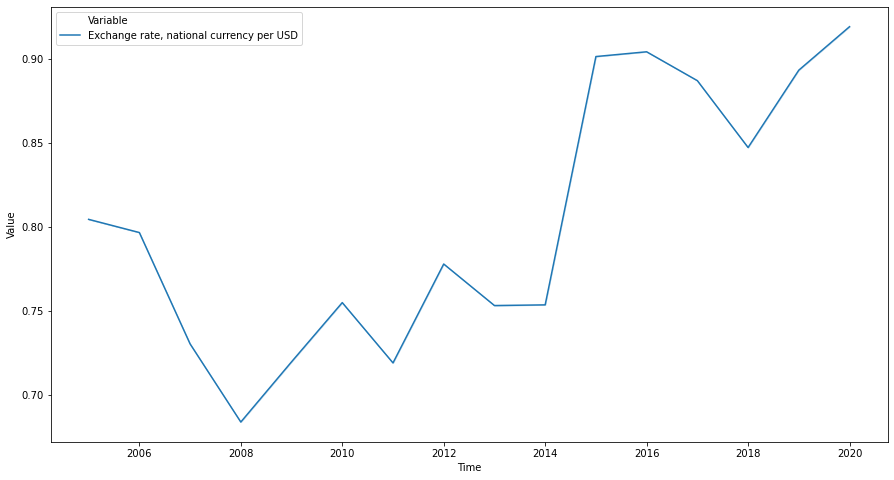

In [42]:
#Visualization of the EUR to USD exchange rate using Seaborn
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x="Time", y="Value", hue = "Variable", ax=ax, data=exchange_total)
plt.show()

In [43]:
#Create a dataframe solely containing information about GDP
gdp_filtered = financial.loc[financial['Variable'] == 'Gross domestic product, nominal value, market prices']

gdp_filtered.head()

,LOCATION,Country,VARIABLE,Variable,EDITION,Edition,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value
400,GRC,Greece,GDP,"Gross domestic product, nominal value, market ...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2005,2005,EUR,Euro,0,Units,NaN,NaN,1.992423e+11
401,GRC,Greece,GDP,"Gross domestic product, nominal value, market ...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2006,2006,EUR,Euro,0,Units,NaN,NaN,2.178616e+11
402,GRC,Greece,GDP,"Gross domestic product, nominal value, market ...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2007,2007,EUR,Euro,0,Units,NaN,NaN,2.326946e+11
403,GRC,Greece,GDP,"Gross domestic product, nominal value, market ...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2008,2008,EUR,Euro,0,Units,NaN,NaN,2.419904e+11
404,GRC,Greece,GDP,"Gross domestic product, nominal value, market ...",EO107_1,EO107_1 Single-hit scenario,A,Annual,2009,2009,EUR,Euro,0,Units,NaN,NaN,2.375342e+11


In [44]:
gdp_filtered = gdp_filtered.drop(['LOCATION','VARIABLE','EDITION','Edition','FREQUENCY','Frequency','TIME','Unit Code','Unit','PowerCode Code','PowerCode','Reference Period Code','Reference Period'], axis = 1)

##### Visualization of the GDP per country using Altair

In [45]:
#Visualization of the GDP per country using Altair
input_dropdown = alt.binding_select(options=['Greece','Italy','Portugal','Slovenia','Spain'])
selection = alt.selection_single(fields=['Country'], bind=input_dropdown, name='Country')
color = alt.condition(selection,
                    alt.Color('Country:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(gdp_filtered).mark_line().encode(
    x='Time',
    y='Value',
    color='Country:N',
    tooltip='Country:N'
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=700,
    height=600
)

alt.Chart(...)

In [46]:
#Create a filter by country to run the analysis for each country
ex_italy_filter = exchange_total[exchange_total['Country'] == 'Italy']
ex_greece_filter = exchange_total[exchange_total['Country'] == 'Greece']
ex_portugal_filter = exchange_total[exchange_total['Country'] == 'Portugal']
ex_spain_filter = exchange_total[exchange_total['Country'] == 'Spain']
ex_slovenia_filter = exchange_total[exchange_total['Country'] == 'Slovenia']

In [47]:
#Create a filter by country to run the analysis for each country
gdp_italy_filter = gdp_filtered[gdp_filtered['Country'] == 'Italy']
gdp_greece_filter = gdp_filtered[gdp_filtered['Country'] == 'Greece']
gdp_portugal_filter = gdp_filtered[gdp_filtered['Country'] == 'Portugal']
gdp_spain_filter = gdp_filtered[gdp_filtered['Country'] == 'Spain']
gdp_slovenia_filter = gdp_filtered[gdp_filtered['Country'] == 'Slovenia']

#### GDP Data

##### Italy

In [48]:
#Retrieve the first five columns of the dataframe GDP Italy to understand how to clean it
gdp_italy_filter.head()

,Country,Variable,Time,Value
1120,Italy,"Gross domestic product, nominal value, market ...",2005,1.494102e+12
1121,Italy,"Gross domestic product, nominal value, market ...",2006,1.554532e+12
1122,Italy,"Gross domestic product, nominal value, market ...",2007,1.614476e+12
1123,Italy,"Gross domestic product, nominal value, market ...",2008,1.637293e+12
1124,Italy,"Gross domestic product, nominal value, market ...",2009,1.576145e+12


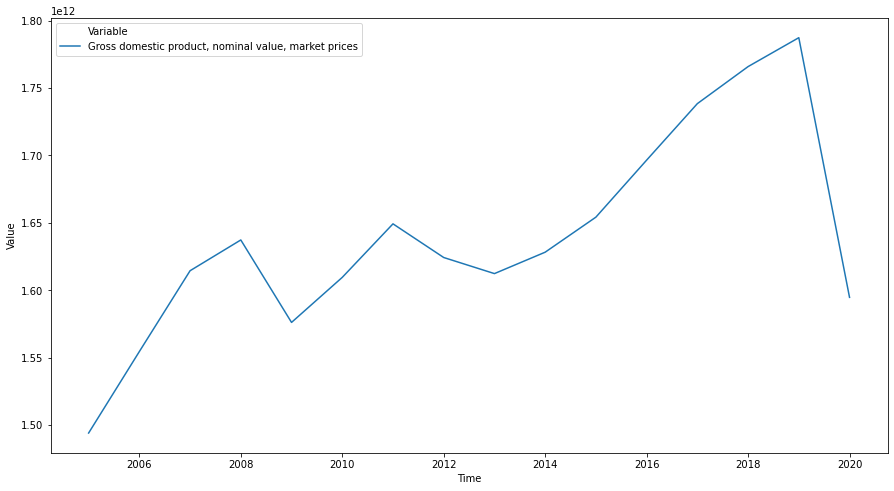

In [49]:
#Visualization of the GDP for Italy using Seaborn
figdims = (11, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x="Time", y="Value", hue = 'Variable', ax=ax, data=gdp_italy_filter)
plt.show()

##### Greece

In [50]:
gdp_greece_filter.head()

,Country,Variable,Time,Value
400,Greece,"Gross domestic product, nominal value, market ...",2005,1.992423e+11
401,Greece,"Gross domestic product, nominal value, market ...",2006,2.178616e+11
402,Greece,"Gross domestic product, nominal value, market ...",2007,2.326946e+11
403,Greece,"Gross domestic product, nominal value, market ...",2008,2.419904e+11
404,Greece,"Gross domestic product, nominal value, market ...",2009,2.375342e+11


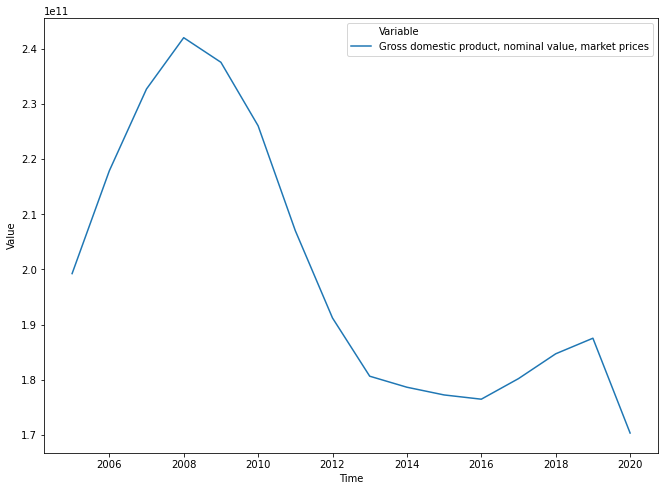

In [51]:
fig_dims = (11, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x="Time", y="Value", hue = 'Variable', ax=ax, data=gdp_greece_filter)
plt.show()

##### Portugal

In [52]:
gdp_portugal_filter.head()

,Country,Variable,Time,Value
1840,Portugal,"Gross domestic product, nominal value, market ...",2005,1.585527e+11
1841,Portugal,"Gross domestic product, nominal value, market ...",2006,1.662605e+11
1842,Portugal,"Gross domestic product, nominal value, market ...",2007,1.754834e+11
1843,Portugal,"Gross domestic product, nominal value, market ...",2008,1.791028e+11
1844,Portugal,"Gross domestic product, nominal value, market ...",2009,1.754164e+11


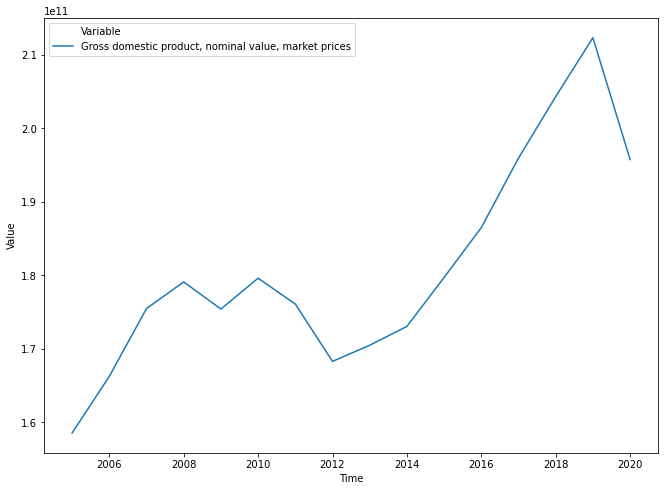

In [53]:
fig_dims = (11, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x="Time", y="Value", hue = 'Variable', ax=ax, data=gdp_portugal_filter)
plt.show()

##### Spain

In [54]:
gdp_spain_filter.head()

,Country,Variable,Time,Value
2560,Spain,"Gross domestic product, nominal value, market ...",2005,9.273570e+11
2561,Spain,"Gross domestic product, nominal value, market ...",2006,1.003823e+12
2562,Spain,"Gross domestic product, nominal value, market ...",2007,1.075539e+12
2563,Spain,"Gross domestic product, nominal value, market ...",2008,1.109541e+12
2564,Spain,"Gross domestic product, nominal value, market ...",2009,1.069323e+12


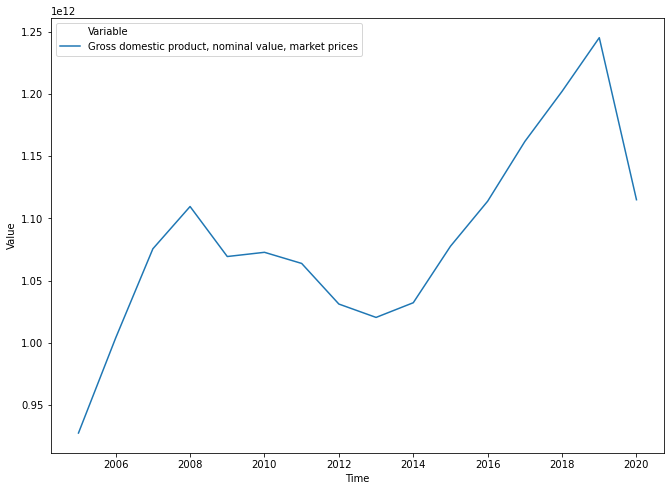

In [55]:
fig_dims = (11, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x="Time", y="Value", hue = 'Variable', ax=ax, data=gdp_spain_filter)
plt.show()

##### Slovenia

In [56]:
gdp_spain_filter.head()

,Country,Variable,Time,Value
2560,Spain,"Gross domestic product, nominal value, market ...",2005,9.273570e+11
2561,Spain,"Gross domestic product, nominal value, market ...",2006,1.003823e+12
2562,Spain,"Gross domestic product, nominal value, market ...",2007,1.075539e+12
2563,Spain,"Gross domestic product, nominal value, market ...",2008,1.109541e+12
2564,Spain,"Gross domestic product, nominal value, market ...",2009,1.069323e+12


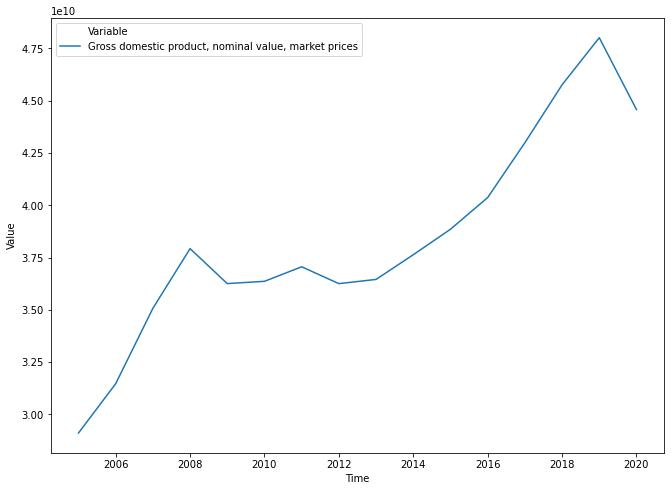

In [57]:
fig_dims = (11, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x="Time", y="Value", hue = 'Variable', ax=ax, data=gdp_slovenia_filter)
plt.show()

### Population

In [58]:
#Check if countries are being retrieved correctly
population[population.Country == 'Italy'].head()

,LOCATION,Country,SEX,Sex,AGE,Age,TIME,Time,Value,Flag Codes,Flags
14,ITA,Italy,T,Total,TOTAL,Total,2005,2005,57969482,NaN,NaN
15,ITA,Italy,T,Total,TOTAL,Total,2006,2006,58143980,NaN,NaN
16,ITA,Italy,T,Total,TOTAL,Total,2007,2007,58438309,NaN,NaN
17,ITA,Italy,T,Total,TOTAL,Total,2008,2008,58826733,NaN,NaN
18,ITA,Italy,T,Total,TOTAL,Total,2009,2009,59095367,NaN,NaN


In [59]:
#Check if countries are being retrieved correctly
population[population.Country == 'Spain'].head()

,LOCATION,Country,SEX,Sex,AGE,Age,TIME,Time,Value,Flag Codes,Flags
42,ESP,Spain,T,Total,TOTAL,Total,2005,2005,43662613,NaN,NaN
43,ESP,Spain,T,Total,TOTAL,Total,2006,2006,44360521,NaN,NaN
44,ESP,Spain,T,Total,TOTAL,Total,2007,2007,45236004,NaN,NaN
45,ESP,Spain,T,Total,TOTAL,Total,2008,2008,45983169,NaN,NaN
46,ESP,Spain,T,Total,TOTAL,Total,2009,2009,46367550,NaN,NaN


In [60]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    280 non-null    object 
 1   Country     280 non-null    object 
 2   SEX         280 non-null    object 
 3   Sex         280 non-null    object 
 4   AGE         280 non-null    object 
 5   Age         280 non-null    object 
 6   TIME        280 non-null    int64  
 7   Time        280 non-null    int64  
 8   Value       280 non-null    int64  
 9   Flag Codes  0 non-null      float64
 10  Flags       0 non-null      float64
dtypes: float64(2), int64(3), object(6)
memory usage: 24.2+ KB


In [61]:
#Check the number of rows and columns
population.shape

(280, 11)

In [62]:
#Check number of missing values
population.isna().sum().sum()

560

In [63]:
population.head()

,LOCATION,Country,SEX,Sex,AGE,Age,TIME,Time,Value,Flag Codes,Flags
0,GRC,Greece,T,Total,TOTAL,Total,2005,2005,10987316,NaN,NaN
1,GRC,Greece,T,Total,TOTAL,Total,2006,2006,11020366,NaN,NaN
2,GRC,Greece,T,Total,TOTAL,Total,2007,2007,11048466,NaN,NaN
3,GRC,Greece,T,Total,TOTAL,Total,2008,2008,11077839,NaN,NaN
4,GRC,Greece,T,Total,TOTAL,Total,2009,2009,11107017,NaN,NaN


In [64]:
#Delete all the columns that are containing solely missing values)
population = population.dropna(axis = 1, how = 'all')

population_total = population[population['Age'] == 'Total']

population_total.head()

,LOCATION,Country,SEX,Sex,AGE,Age,TIME,Time,Value
0,GRC,Greece,T,Total,TOTAL,Total,2005,2005,10987316
1,GRC,Greece,T,Total,TOTAL,Total,2006,2006,11020366
2,GRC,Greece,T,Total,TOTAL,Total,2007,2007,11048466
3,GRC,Greece,T,Total,TOTAL,Total,2008,2008,11077839
4,GRC,Greece,T,Total,TOTAL,Total,2009,2009,11107017


##### Visualization of the population per country using Altair

In [65]:
#Visualization of the population per country using Altair

input_dropdown = alt.binding_select(options=['Greece','Italy','Portugal','Slovenia','Spain'])
selection = alt.selection_single(fields=['Country'], bind=input_dropdown, name='Country')
color = alt.condition(selection,
                    alt.Color('Country:N', legend=None),
                    alt.value('lightgray'))

alt.Chart(population_total).mark_line().encode(
    x='Time',
    y='Value',
    color='Country:N',
    tooltip='Country:N'
).properties(
    width=700,
    height=600
)

alt.Chart(...)

In [66]:
#Create a filter by country to run the analysis for each country
pop_italy_filter = population[population['Country'] == 'Italy']
pop_greece_filter = population[population['Country'] == 'Greece']
pop_portugal_filter = population[population['Country'] == 'Portugal']
pop_spain_filter = population[population['Country'] == 'Spain']
pop_slovenia_filter = population[population['Country'] == 'Slovenia']

#### Italy

In [67]:
pop_italy_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 14 to 237
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LOCATION  56 non-null     object
 1   Country   56 non-null     object
 2   SEX       56 non-null     object
 3   Sex       56 non-null     object
 4   AGE       56 non-null     object
 5   Age       56 non-null     object
 6   TIME      56 non-null     int64 
 7   Time      56 non-null     int64 
 8   Value     56 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 4.4+ KB


In [68]:
#Create a clean version of the dataset per country
population_italy1 = pop_italy_filter.drop(['LOCATION','SEX','AGE','TIME'], axis=1)

population_italy1.head(15)

,Country,Sex,Age,Time,Value
14,Italy,Total,Total,2005,57969482
15,Italy,Total,Total,2006,58143980
16,Italy,Total,Total,2007,58438309
17,Italy,Total,Total,2008,58826733
18,Italy,Total,Total,2009,59095367
19,Italy,Total,Total,2010,59277414
20,Italy,Total,Total,2011,59379446
21,Italy,Total,Total,2012,59539725
22,Italy,Total,Total,2013,60233944
23,Italy,Total,Total,2014,60789144


In [69]:
#Creation of two different dataframes to seperate total population and age groups
pop_total_italy = population_italy1[population_italy1.Age == 'Total']
pop_categories_italy = population_italy1[~population_italy1.Age.str.contains('Total')] 


##### Visualization of the population for Italy per age group

In [70]:
#Visualization of the population per age group
alt.Chart(pop_categories_italy).mark_bar().encode(
    x='Time:O',
    y='Value:Q',
    color='Age:N',
    column='Age:N'
).properties(
    width=200,
    height=200
)

alt.Chart(...)

##### Visualization of the total population for Italy

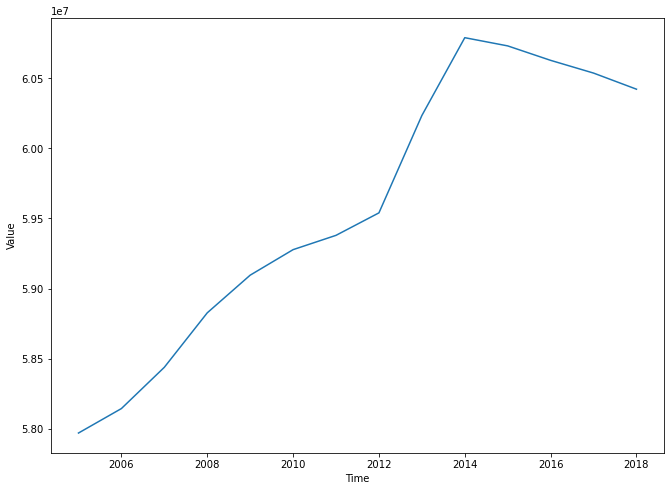

In [71]:
#Visualization of the total population for Italy
fig_dims = (11, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x="Time", y="Value", ax=ax, data=pop_total_italy)
plt.show()

#### Greece

In [72]:
pop_greece_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 223
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LOCATION  56 non-null     object
 1   Country   56 non-null     object
 2   SEX       56 non-null     object
 3   Sex       56 non-null     object
 4   AGE       56 non-null     object
 5   Age       56 non-null     object
 6   TIME      56 non-null     int64 
 7   Time      56 non-null     int64 
 8   Value     56 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 4.4+ KB


In [73]:
#Create a clean version of the dataset per country
population_greece1 = pop_greece_filter.drop(['LOCATION','SEX','AGE','TIME'], axis=1)

population_greece1.head(15)

,Country,Sex,Age,Time,Value
0,Greece,Total,Total,2005,10987316
1,Greece,Total,Total,2006,11020366
2,Greece,Total,Total,2007,11048466
3,Greece,Total,Total,2008,11077839
4,Greece,Total,Total,2009,11107017
5,Greece,Total,Total,2010,11121344
6,Greece,Total,Total,2011,11104900
7,Greece,Total,Total,2012,11045010
8,Greece,Total,Total,2013,10965209
9,Greece,Total,Total,2014,10892415


In [74]:
#Creation of two different dataframes to seperate total population and age groups
pop_total_greece = population_greece1[population_greece1.Age == 'Total']
pop_categories_greece = population_greece1[~population_greece1.Age.str.contains('Total')] 

In [75]:
#Visualization of the population per age group
alt.Chart(pop_categories_greece).mark_bar().encode(
    x='Time:O',
    y='Value:Q',
    color='Age:N',
    column='Age:N'
).properties(
    width=200,
    height=200
)

alt.Chart(...)

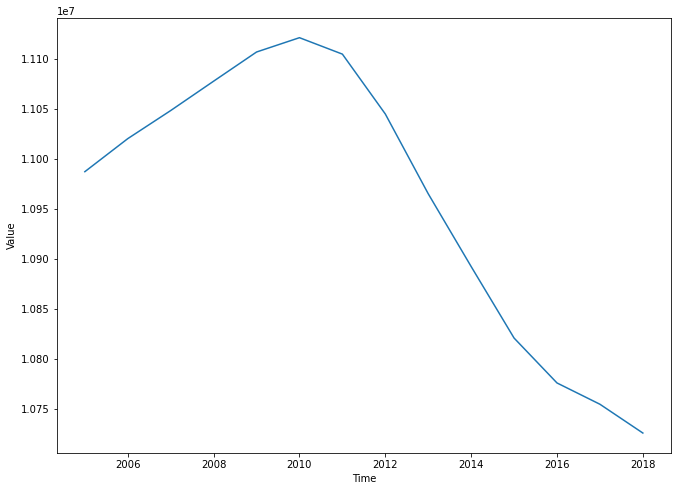

In [76]:
fig_dims = (11, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x="Time", y="Value", ax=ax, data=pop_total_greece)
plt.show()

#### Portugal

In [77]:
pop_portugal_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 28 to 251
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LOCATION  56 non-null     object
 1   Country   56 non-null     object
 2   SEX       56 non-null     object
 3   Sex       56 non-null     object
 4   AGE       56 non-null     object
 5   Age       56 non-null     object
 6   TIME      56 non-null     int64 
 7   Time      56 non-null     int64 
 8   Value     56 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 4.4+ KB


In [78]:
#Create a clean version of the dataset per country
population_portugal1 = pop_portugal_filter.drop(['LOCATION','SEX','AGE','TIME'], axis=1)

population_portugal1.head(15)

,Country,Sex,Age,Time,Value
28,Portugal,Total,Total,2005,10503330
29,Portugal,Total,Total,2006,10522288
30,Portugal,Total,Total,2007,10542964
31,Portugal,Total,Total,2008,10558177
32,Portugal,Total,Total,2009,10568247
33,Portugal,Total,Total,2010,10573100
34,Portugal,Total,Total,2011,10557560
35,Portugal,Total,Total,2012,10514844
36,Portugal,Total,Total,2013,10457295
37,Portugal,Total,Total,2014,10401062


In [79]:
#Creation of two different dataframes to seperate total population and age groups
pop_total_portugal = population_portugal1[population_portugal1.Age == 'Total']
pop_categories_portugal = population_portugal1[~population_portugal1.Age.str.contains('Total')] 

In [80]:
#Visualization of the population per age group
alt.Chart(pop_categories_portugal).mark_bar().encode(
    x='Time:O',
    y='Value:Q',
    color='Age:N',
    column='Age:N'
).properties(
    width=200,
    height=200
)

alt.Chart(...)

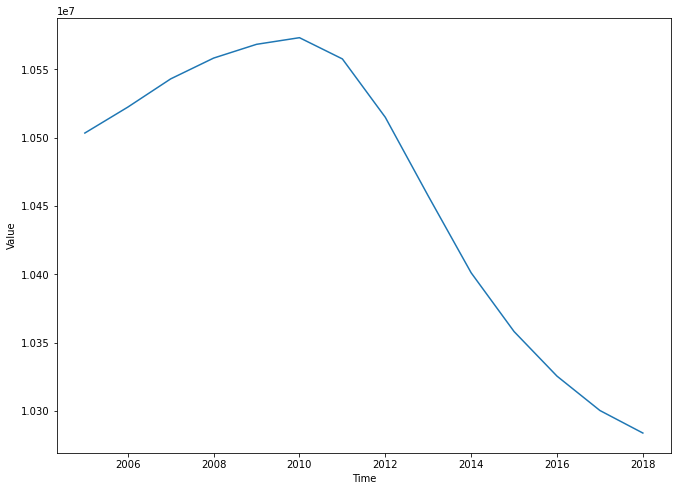

In [81]:
fig_dims = (11, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x="Time", y="Value", ax=ax, data=pop_total_portugal)
plt.show()

#### Spain

In [82]:
pop_spain_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 42 to 265
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LOCATION  56 non-null     object
 1   Country   56 non-null     object
 2   SEX       56 non-null     object
 3   Sex       56 non-null     object
 4   AGE       56 non-null     object
 5   Age       56 non-null     object
 6   TIME      56 non-null     int64 
 7   Time      56 non-null     int64 
 8   Value     56 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 4.4+ KB


In [83]:
pop_spain_filter.head()

,LOCATION,Country,SEX,Sex,AGE,Age,TIME,Time,Value
42,ESP,Spain,T,Total,TOTAL,Total,2005,2005,43662613
43,ESP,Spain,T,Total,TOTAL,Total,2006,2006,44360521
44,ESP,Spain,T,Total,TOTAL,Total,2007,2007,45236004
45,ESP,Spain,T,Total,TOTAL,Total,2008,2008,45983169
46,ESP,Spain,T,Total,TOTAL,Total,2009,2009,46367550


In [84]:
#Create a clean version of the dataset per country
population_spain1 = pop_spain_filter.drop(['LOCATION','SEX','AGE','TIME'], axis=1)

population_spain1.head(15)

,Country,Sex,Age,Time,Value
42,Spain,Total,Total,2005,43662613
43,Spain,Total,Total,2006,44360521
44,Spain,Total,Total,2007,45236004
45,Spain,Total,Total,2008,45983169
46,Spain,Total,Total,2009,46367550
47,Spain,Total,Total,2010,46562483
48,Spain,Total,Total,2011,46736257
49,Spain,Total,Total,2012,46766403
50,Spain,Total,Total,2013,46593236
51,Spain,Total,Total,2014,46455123


In [85]:
#Creation of two different dataframes to seperate total population and age groups
pop_total_spain = population_spain1[population_spain1.Age == 'Total']
pop_categories_spain = population_spain1[~population_spain1.Age.str.contains('Total')] 

In [86]:
#Visualization of the population per age group
alt.Chart(pop_categories_spain).mark_bar().encode(
    x='Time:O',
    y='Value:Q',
    color='Age:N',
    column='Age:N'
).properties(
    width=200,
    height=200
)

alt.Chart(...)

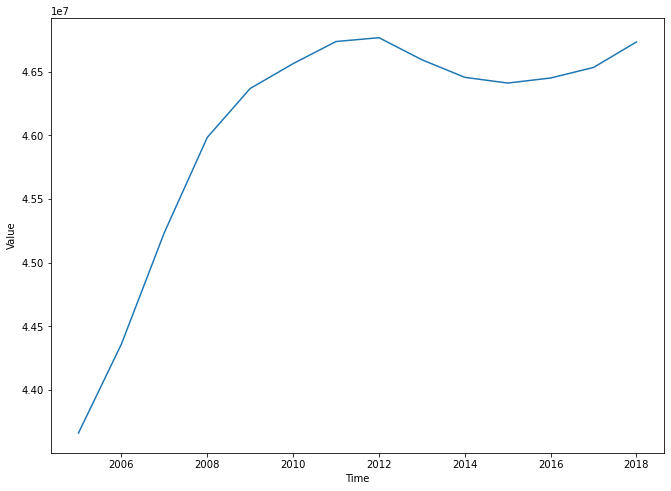

In [87]:
fig_dims = (11, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x="Time", y="Value", ax=ax, data=pop_total_spain)
plt.show()

#### Slovenia

In [88]:
pop_slovenia_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 56 to 279
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LOCATION  56 non-null     object
 1   Country   56 non-null     object
 2   SEX       56 non-null     object
 3   Sex       56 non-null     object
 4   AGE       56 non-null     object
 5   Age       56 non-null     object
 6   TIME      56 non-null     int64 
 7   Time      56 non-null     int64 
 8   Value     56 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 4.4+ KB


In [89]:
pop_slovenia_filter.head()

,LOCATION,Country,SEX,Sex,AGE,Age,TIME,Time,Value
56,SVN,Slovenia,T,Total,TOTAL,Total,2005,2005,2001114
57,SVN,Slovenia,T,Total,TOTAL,Total,2006,2006,2008516
58,SVN,Slovenia,T,Total,TOTAL,Total,2007,2007,2019406
59,SVN,Slovenia,T,Total,TOTAL,Total,2008,2008,2022629
60,SVN,Slovenia,T,Total,TOTAL,Total,2009,2009,2042335


In [90]:
#Create a clean version of the dataset per country
population_slovenia1 = pop_slovenia_filter.drop(['LOCATION','SEX','AGE','TIME'], axis=1)

population_slovenia1.head(15)

,Country,Sex,Age,Time,Value
56,Slovenia,Total,Total,2005,2001114
57,Slovenia,Total,Total,2006,2008516
58,Slovenia,Total,Total,2007,2019406
59,Slovenia,Total,Total,2008,2022629
60,Slovenia,Total,Total,2009,2042335
61,Slovenia,Total,Total,2010,2049261
62,Slovenia,Total,Total,2011,2052496
63,Slovenia,Total,Total,2012,2056262
64,Slovenia,Total,Total,2013,2059114
65,Slovenia,Total,Total,2014,2061623


In [91]:
#Creation of two different dataframes to seperate total population and age groups
pop_total_slovenia = population_slovenia1[population_slovenia1.Age == 'Total']
pop_categories_slovenia = population_slovenia1[~population_slovenia1.Age.str.contains('Total')] 

In [92]:
#Visualization of the population per age group
alt.Chart(pop_categories_slovenia).mark_bar().encode(
    x='Time:O',
    y='Value:Q',
    color='Age:N',
    column='Age:N'
).properties(
    width=200,
    height=200
)

alt.Chart(...)

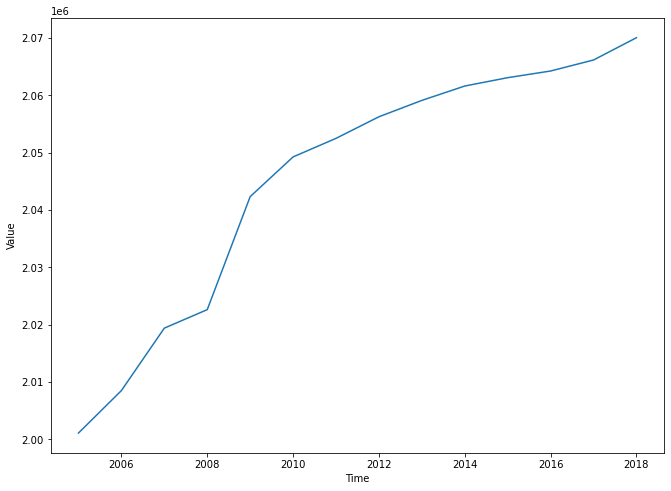

In [93]:
fig_dims = (11, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(x="Time", y="Value", ax=ax, data=pop_total_slovenia)
plt.show()

## Merge Data

In [94]:
#Housing parameters based on using the Real House Price indices
housing_real_house_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 299 to 2422
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    73 non-null     object 
 1   IND        73 non-null     object 
 2   Indicator  73 non-null     object 
 3   Time       73 non-null     object 
 4   Value      73 non-null     float64
dtypes: float64(1), object(4)
memory usage: 3.4+ KB


In [95]:
#Convert the Time column from an object to an integer type
housing_real_house_prices = housing_real_house_prices.astype({"Time": int})

In [96]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3584 non-null   object 
 1   Country                3584 non-null   object 
 2   VARIABLE               3584 non-null   object 
 3   Variable               3584 non-null   object 
 4   EDITION                3584 non-null   object 
 5   Edition                3584 non-null   object 
 6   FREQUENCY              3584 non-null   object 
 7   Frequency              3584 non-null   object 
 8   TIME                   3584 non-null   int64  
 9   Time                   3584 non-null   int64  
 10  Unit Code              3584 non-null   object 
 11  Unit                   3584 non-null   object 
 12  PowerCode Code         3584 non-null   int64  
 13  PowerCode              3584 non-null   object 
 14  Reference Period Code  2240 non-null   float64
 15  Refe

In [97]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LOCATION  280 non-null    object
 1   Country   280 non-null    object
 2   SEX       280 non-null    object
 3   Sex       280 non-null    object
 4   AGE       280 non-null    object
 5   Age       280 non-null    object
 6   TIME      280 non-null    int64 
 7   Time      280 non-null    int64 
 8   Value     280 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 19.8+ KB


In [98]:
#Create a pivot table to prepare the data for a merge

housing_pivot_real = housing_real_house_prices.pivot_table(values='Value', index = ['Country','Time'], columns = ['Indicator'])

housing_pivot_real = pd.DataFrame(housing_pivot_real.to_records())

housing_pivot_real

,Country,Time,"Real house price indices, s.a."
0,Greece,2005,156.169507
1,Greece,2006,170.923329
2,Greece,2007,175.175023
3,Greece,2008,170.327760
4,Greece,2009,161.469800
...,...,...,...
68,Spain,2015,100.000000
69,Spain,2016,104.450073
70,Spain,2017,109.246189
71,Spain,2018,114.891297


##### Pivot Table joining all financial data

In [99]:
#Create a pivot table to prepare the data for a merge
financial_pivot = financial.pivot_table(values='Value', index=['Country','Time'], columns = ['Variable'])

financial_pivot = pd.DataFrame(financial_pivot.to_records())

financial_pivot.head()

,Country,Time,"Change in inventories, contributions to changes in real GDP","Consumer price index, harmonised","Core inflation index, harmonised",Current account balance as a percentage of GDP,"Exchange rate, USD per national currency","Exchange rate, national currency per USD","Exports of goods and services, deflator (national accounts basis)","Exports of goods and services, volume (national accounts basis)",...,Labour force,Long-term interest rate on government bonds,Net disposable income of households and non-profit institutions serving households,"Net exports, contributions to changes in real GDP","Private final consumption expenditure, volume","Private final consumption expenditure, volume, growth","Purchasing power parity, national currency per USD",Short-term interest rate,Total employment (labour force survey basis),Unemployment rate
0,Greece,2005,0.205935,0.849730,0.875051,-8.870606,1.244458,0.804619,0.874575,4.855270e+10,...,4937100.0,3.585000,NaN,0.442226,1.539518e+11,3.224842,0.708976,2.184675,4443550.0,9.996759
1,Greece,2006,1.238916,0.877887,0.896413,-11.486191,1.256058,0.796697,0.903030,5.108360e+10,...,4975725.0,4.070000,NaN,-2.827255,1.582345e+11,2.781845,0.693291,3.079225,4527500.0,9.008235
2,Greece,2007,-1.532022,0.904129,0.924143,-15.187718,1.370785,0.730485,0.927366,5.650790e+10,...,4982400.0,4.500000,NaN,-2.661263,1.646845e+11,4.076229,0.719064,4.277608,4564050.0,8.396556
3,Greece,2008,-0.628778,0.942377,0.952990,-15.112583,1.468287,0.683982,0.966864,5.847030e+10,...,4998375.0,4.802500,NaN,0.319797,1.705866e+11,3.583883,0.707951,4.634233,4610500.0,7.760022
4,Greece,2009,-3.271774,0.955070,0.974554,-12.346012,1.392497,0.719800,0.946417,4.764200e+10,...,5040700.0,5.174167,NaN,2.994522,1.677377e+11,-1.670061,0.703755,1.228358,4556000.0,9.615728


In [100]:
#Create a pivot table to prepare the data for a merge
population_pivot = population_total.pivot_table(values='Value', index = ['Country','Time'], columns = 'Age')

population_pivot = pd.DataFrame(population_pivot.to_records())

population_pivot.head()

,Country,Time,Total
0,Greece,2005,10987316
1,Greece,2006,11020366
2,Greece,2007,11048466
3,Greece,2008,11077839
4,Greece,2009,11107017


In [101]:
#Merge the data using an inner join on 'Country' and 'Time' columns

merged_dataset = pd.merge(housing_pivot_real, financial_pivot, on=['Country','Time'], how='inner')
merged_dataset = pd.merge(merged_dataset, population_pivot, on=['Country','Time'], how='inner')

#Drop columns containing missing values for a proper analysis
merged_dataset = merged_dataset.dropna(axis=1)

merged_dataset.isna().sum()

Country                                                                         0
Time                                                                            0
Real house price indices, s.a.                                                  0
Change in inventories, contributions to changes in real GDP                     0
Consumer price index, harmonised                                                0
Core inflation index, harmonised                                                0
Current account balance as a percentage of GDP                                  0
Exchange rate, USD per national currency                                        0
Exchange rate, national currency per USD                                        0
Exports of goods and services, deflator (national accounts basis)               0
Exports of goods and services, volume (national accounts basis)                 0
Exports of goods and services, volume in USD (national accounts basis)          0
Exports of goods

##### Full merge of the Real House Price data for analysis

In [102]:
#Rename the 'Total' column to 'Population'
merged_dataset = merged_dataset.rename(columns={'Total':'Population'})

#Look at the new table containing all the data
merged_dataset.head(10)

,Country,Time,"Real house price indices, s.a.","Change in inventories, contributions to changes in real GDP","Consumer price index, harmonised","Core inflation index, harmonised",Current account balance as a percentage of GDP,"Exchange rate, USD per national currency","Exchange rate, national currency per USD","Exports of goods and services, deflator (national accounts basis)",...,Labour force,Long-term interest rate on government bonds,"Net exports, contributions to changes in real GDP","Private final consumption expenditure, volume","Private final consumption expenditure, volume, growth","Purchasing power parity, national currency per USD",Short-term interest rate,Total employment (labour force survey basis),Unemployment rate,Population
0,Greece,2005,156.169507,0.205935,0.849730,0.875051,-8.870606,1.244458,0.804619,0.874575,...,4937100.0,3.585000,0.442226,1.539518e+11,3.224842,0.708976,2.184675,4443550.0,9.996759,10987316
1,Greece,2006,170.923329,1.238916,0.877887,0.896413,-11.486191,1.256058,0.796697,0.903030,...,4975725.0,4.070000,-2.827255,1.582345e+11,2.781845,0.693291,3.079225,4527500.0,9.008235,11020366
2,Greece,2007,175.175023,-1.532022,0.904129,0.924143,-15.187718,1.370785,0.730485,0.927366,...,4982400.0,4.500000,-2.661263,1.646845e+11,4.076229,0.719064,4.277608,4564050.0,8.396556,11048466
3,Greece,2008,170.327760,-0.628778,0.942377,0.952990,-15.112583,1.468287,0.683982,0.966864,...,4998375.0,4.802500,0.319797,1.705866e+11,3.583883,0.707951,4.634233,4610500.0,7.760022,11077839
4,Greece,2009,161.469800,-3.271774,0.955070,0.974554,-12.346012,1.392497,0.719800,0.946417,...,5040700.0,5.174167,2.994522,1.677377e+11,-1.670061,0.703755,1.228358,4556000.0,9.615728,11107017
5,Greece,2010,148.967453,2.047160,1.000000,1.000000,-10.021174,1.326030,0.755044,1.000000,...,5029125.0,9.091667,1.909440,1.568032e+11,-6.518809,0.721494,0.810950,4389750.0,12.713444,11121344
6,Greece,2011,137.682731,-0.120859,1.031179,1.010790,-8.612324,1.391454,0.719159,1.057917,...,4936175.0,15.749167,2.909286,1.415184e+11,-9.747760,0.713163,1.390600,4054350.0,17.864541,11104900
7,Greece,2012,120.945753,-0.044983,1.041849,1.007477,-3.484239,1.285729,0.778006,1.084796,...,4890075.0,22.497500,3.239583,1.301646e+11,-8.022844,0.684663,0.573183,3694975.0,24.439298,11045010
8,Greece,2013,109.724855,-0.205455,1.032950,0.983285,-1.432570,1.327806,0.753298,1.068450,...,4843550.0,10.054167,1.226106,1.268206e+11,-2.569055,0.631286,0.220667,3513200.0,27.466424,10965209
9,Greece,2014,103.569357,1.339957,1.018553,0.968636,-0.738848,1.328729,0.753695,1.045893,...,4810675.0,6.929167,-0.194208,1.276107e+11,0.623006,0.611135,0.209933,3536250.0,26.491605,10892415


### Rent Prices Data Set

In [103]:
housing_rent_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 77 to 2123
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    75 non-null     object 
 1   IND        75 non-null     object 
 2   Indicator  75 non-null     object 
 3   Time       75 non-null     object 
 4   Value      75 non-null     float64
dtypes: float64(1), object(4)
memory usage: 3.5+ KB


In [104]:
#Convert the Time column from an object to an integer type
housing_rent_prices = housing_rent_prices.astype({"Time": int})

In [105]:
#Create a pivot table to prepare the data for a merge
housing_pivot_rent = housing_rent_prices.pivot_table(values='Value', index = ['Country','Time'], columns = ['Indicator'])

housing_pivot_rent = pd.DataFrame(housing_pivot_rent.to_records())

housing_pivot_rent

,Country,Time,"Rent prices, s.a."
0,Greece,2005,102.331967
1,Greece,2006,106.798942
2,Greece,2007,111.657667
3,Greece,2008,115.997766
4,Greece,2009,120.196566
...,...,...,...
70,Spain,2015,100.000000
71,Spain,2016,99.912095
72,Spain,2017,100.322318
73,Spain,2018,101.590218


In [106]:
#Merge the data using an inner join on 'Country' and 'Time' columns
merged_dataset_rent = pd.merge(housing_pivot_rent, financial_pivot, on=['Country','Time'], how='inner')
merged_dataset_rent = pd.merge(merged_dataset_rent, population_pivot, on=['Country','Time'], how='inner')

#Drop all columns containing missing values for a clear analysis
merged_dataset_rent = merged_dataset_rent.dropna(axis=1)

#Check for any remaining missing values in the columns
merged_dataset_rent.isna().sum()

Country                                                                         0
Time                                                                            0
Rent prices, s.a.                                                               0
Change in inventories, contributions to changes in real GDP                     0
Consumer price index, harmonised                                                0
Core inflation index, harmonised                                                0
Current account balance as a percentage of GDP                                  0
Exchange rate, USD per national currency                                        0
Exchange rate, national currency per USD                                        0
Exports of goods and services, deflator (national accounts basis)               0
Exports of goods and services, volume (national accounts basis)                 0
Exports of goods and services, volume in USD (national accounts basis)          0
Exports of goods

##### Full merge of the data for analysis

In [107]:
#Rename the 'Total' column to 'Population'
merged_dataset_rent = merged_dataset_rent.rename(columns={'Total':'Population'})

#Look at the table containing all the data
merged_dataset_rent.head(10)

,Country,Time,"Rent prices, s.a.","Change in inventories, contributions to changes in real GDP","Consumer price index, harmonised","Core inflation index, harmonised",Current account balance as a percentage of GDP,"Exchange rate, USD per national currency","Exchange rate, national currency per USD","Exports of goods and services, deflator (national accounts basis)",...,Labour force,Long-term interest rate on government bonds,"Net exports, contributions to changes in real GDP","Private final consumption expenditure, volume","Private final consumption expenditure, volume, growth","Purchasing power parity, national currency per USD",Short-term interest rate,Total employment (labour force survey basis),Unemployment rate,Population
0,Greece,2005,102.331967,0.205935,0.849730,0.875051,-8.870606,1.244458,0.804619,0.874575,...,4937100.0,3.585000,0.442226,1.539518e+11,3.224842,0.708976,2.184675,4443550.0,9.996759,10987316
1,Greece,2006,106.798942,1.238916,0.877887,0.896413,-11.486191,1.256058,0.796697,0.903030,...,4975725.0,4.070000,-2.827255,1.582345e+11,2.781845,0.693291,3.079225,4527500.0,9.008235,11020366
2,Greece,2007,111.657667,-1.532022,0.904129,0.924143,-15.187718,1.370785,0.730485,0.927366,...,4982400.0,4.500000,-2.661263,1.646845e+11,4.076229,0.719064,4.277608,4564050.0,8.396556,11048466
3,Greece,2008,115.997766,-0.628778,0.942377,0.952990,-15.112583,1.468287,0.683982,0.966864,...,4998375.0,4.802500,0.319797,1.705866e+11,3.583883,0.707951,4.634233,4610500.0,7.760022,11077839
4,Greece,2009,120.196566,-3.271774,0.955070,0.974554,-12.346012,1.392497,0.719800,0.946417,...,5040700.0,5.174167,2.994522,1.677377e+11,-1.670061,0.703755,1.228358,4556000.0,9.615728,11107017
5,Greece,2010,123.135091,2.047160,1.000000,1.000000,-10.021174,1.326030,0.755044,1.000000,...,5029125.0,9.091667,1.909440,1.568032e+11,-6.518809,0.721494,0.810950,4389750.0,12.713444,11121344
6,Greece,2011,124.163416,-0.120859,1.031179,1.010790,-8.612324,1.391454,0.719159,1.057917,...,4936175.0,15.749167,2.909286,1.415184e+11,-9.747760,0.713163,1.390600,4054350.0,17.864541,11104900
7,Greece,2012,121.580841,-0.044983,1.041849,1.007477,-3.484239,1.285729,0.778006,1.084796,...,4890075.0,22.497500,3.239583,1.301646e+11,-8.022844,0.684663,0.573183,3694975.0,24.439298,11045010
8,Greece,2013,113.329342,-0.205455,1.032950,0.983285,-1.432570,1.327806,0.753298,1.068450,...,4843550.0,10.054167,1.226106,1.268206e+11,-2.569055,0.631286,0.220667,3513200.0,27.466424,10965209
9,Greece,2014,104.637267,1.339957,1.018553,0.968636,-0.738848,1.328729,0.753695,1.045893,...,4810675.0,6.929167,-0.194208,1.276107e+11,0.623006,0.611135,0.209933,3536250.0,26.491605,10892415


## Analyzing data

### Real House Prices indices as the Dependent Variable

In [108]:
#Import all necessary packages for linear regression
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [109]:
#Create a 'variable' and 'target' to compute the regression
variables_real_house = merged_dataset.iloc[:,3:]
target_real_house = merged_dataset['Real house price indices, s.a.']

X_real_house = variables_real_house
Y_real_house = target_real_house

#Fit the data to X and Y
real_house_prices_model = LinearRegression(fit_intercept = True).fit(X_real_house, Y_real_house)

In [110]:
#Retrieve R squared - or coefficient of determination
r_squared = real_house_prices_model.score(X_real_house, Y_real_house)

print('The coefficient of determination is', r_squared)

The coefficient of determination is 0.9845280184517973


In [111]:
#Get more insight including the intercept of the equation and the coefficients
print('The intercept of the equation is', real_house_prices_model.intercept_)

print('The slope of the equation is', real_house_prices_model.coef_)

#Get length of the object to be able to create a dataframe
len(real_house_prices_model.coef_)

#Transform the data into a numpy array to convert it to a dataframe
real_house_coefficients = np.around(real_house_prices_model.coef_, 45)

real_house_coefficients_df = pd.DataFrame(real_house_coefficients, X_real_house.columns, columns = ["Coefficient"])

The intercept of the equation is 845.813837039071
The slope of the equation is [-7.43121939e-01 -3.28713519e+02 -1.10901734e+02  9.23291312e-01
 -2.72564341e+02 -4.42439825e+02 -1.07271651e+02 -1.80668524e-08
  9.01248070e+00  1.79750302e+00 -6.12412674e-01  1.89043023e-01
  1.21375340e+00 -1.42361971e+00 -1.80249614e+01 -1.65172299e-09
 -2.46630828e-01 -2.29532722e-09  3.95897747e+02 -3.28410474e+01
  3.30945057e+01  2.05087032e-10  7.02325170e-10  1.99784681e-09
 -3.28806328e+01 -8.98078890e-10  3.98276079e-11  8.03343136e-02
  1.98090436e-01 -4.89780418e+00  1.60695356e+00  2.98702059e+01
  8.23974372e-09  9.01248068e+00 -2.14211071e+00 -1.15596857e-05
 -1.27835769e-01 -4.13079591e+00 -2.42050046e-09 -5.65330221e-01
  1.64479960e+02  4.53335182e+00 -1.35172243e-05 -1.40471801e+00
  3.31283743e-06]


In [112]:
#Sort the dataframe based on the coefficients to perform the analysis
sorted_real_house_coefficients_df = real_house_coefficients_df.sort_values(by="Coefficient", ascending=False)

len(sorted_real_house_coefficients_df)

45

##### Top 5 variables that have a positive effect on Real House prices

In [113]:
#Top 5 variables that have a positive effect on Real House prices

sorted_real_house_coefficients_df.head()

,Coefficient
"Gross domestic product, market prices, deflator",395.897747
"Purchasing power parity, national currency per USD",164.479960
"Gross domestic product, nominal value, growth",33.094506
"Imports of goods and services, deflator (national accounts basis)",29.870206
"Exports of goods and services, volume in USD (national accounts basis)",9.012481


##### Top 5 variables that have a negative effect on Real House prices

In [114]:
#Top 5 variables that have a negative effect on Real House prices
sorted_real_house_coefficients_df.tail()

,Coefficient
"Exports of goods and services, deflator (national accounts basis)",-107.271651
"Core inflation index, harmonised",-110.901734
"Exchange rate, USD per national currency",-272.564341
"Consumer price index, harmonised",-328.713519
"Exchange rate, national currency per USD",-442.439825


##### Top 10 variables that don't have any effect on Real House Prices

In [115]:
#Top 10 variables that don't have any effect on Real House Prices
sorted_real_house_coefficients_df.iloc[18:28,:]

,Coefficient
"Gross domestic product, nominal value, market prices",2.050870e-10
"Gross fixed capital formation, total, volume",3.982761e-11
"Gross domestic product, volume, market prices",-8.980789e-10
"Government final consumption expenditure, volume",-1.651723e-09
"Gross capital formation, total, volume",-2.295327e-09
"Private final consumption expenditure, volume",-2.420500e-09
"Exports of goods and services, volume (national accounts basis)",-1.806685e-08
Labour force,-1.155969e-05
Total employment (labour force survey basis),-1.351722e-05
Long-term interest rate on government bonds,-1.278358e-01


##### Predicted values based on the linear model

In [116]:
#Predict house prices based on the linear regression and data
Y_predict_real_house = real_house_prices_model.predict(X_real_house)

print(Y_predict_real_house)

[156.10792526 167.10069665 175.76967402 174.05805124 160.01588677
 152.80789763 135.36072942 117.33882499 113.2743056  100.73062689
 107.06086014  97.04952233  96.82953358  93.95284996 130.79876741
 129.89256123 136.16420587 130.66051604 128.73172622 126.55279419
 124.8869305  114.89444285 109.6848398  107.01940493  99.77121824
 100.42601893  95.21565468  99.14335265 122.90095871 124.39170735
 126.06460764 114.84756436 116.68573293 118.6346746  106.23885576
  94.01027736  98.00823555  98.57848979 103.75119712 105.66881596
 110.76001271 117.61330126 137.98549601 134.51235187 125.35075705
 124.49186414 123.78691328 110.65408186 105.14566508  97.3070535
  99.99898943 103.07221791 112.05374797 120.88762693 142.38099688
 150.79769275 164.33985155 159.48471298 146.72731857 140.17173318
 128.66228102 107.15817071  95.73364677  94.98669115 100.03215646
 106.48123974 107.18410781 116.75032621]


##### Plot the results using matplotlib to visualize the relationship between the real and predicted indices

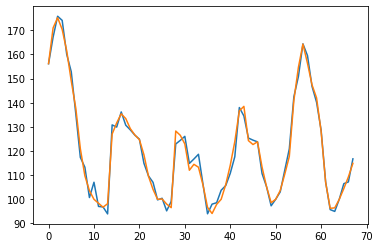

In [117]:
#Plot the results using matplotlib to visualize the relationship between the real and predicted indices
plt.plot(Y_predict_real_house)
plt.plot(Y_real_house)
plt.show()

In [118]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

#Create a full report including every coefficient, as well as a few statistical metrics.
X2 = sm.add_constant(X_real_house)
est = sm.OLS(Y_real_house, X2)
model2 = est.fit()
print(model2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Real house price indices, s.a.   R-squared:                       0.987
Model:                                        OLS   Adj. R-squared:                  0.972
Method:                             Least Squares   F-statistic:                     65.52
Date:                            Wed, 18 Nov 2020   Prob (F-statistic):           3.74e-21
Time:                                    15:44:41   Log-Likelihood:                -156.65
No. Observations:                              68   AIC:                             387.3
Df Residuals:                                  31   BIC:                             469.4
Df Model:                                      36                                         
Covariance Type:                        nonrobust                                         
                                                                                   coef   

### Real House Prices indices as the Dependent Variable

In [119]:
#Create a 'variable' and 'target' to compute the regression
variables_rent_prices = merged_dataset_rent.iloc[:,3:]
target_rent_prices = merged_dataset_rent['Rent prices, s.a.']

X_rent_prices = variables_rent_prices
Y_rent_prices = target_rent_prices

#Fit the data to X and Y
rent_prices_model = LinearRegression(fit_intercept = True).fit(X_rent_prices, Y_rent_prices)

In [120]:
X_rent_prices.columns

Index(['Change in inventories, contributions to changes in real GDP',
       'Consumer price index, harmonised', 'Core inflation index, harmonised',
       'Current account balance as a percentage of GDP',
       'Exchange rate, USD per national currency',
       'Exchange rate, national currency per USD',
       'Exports of goods and services, deflator (national accounts basis)',
       'Exports of goods and services, volume (national accounts basis)',
       'Exports of goods and services, volume in USD (national accounts basis)',
       'Exports of goods and services, volume, growth (national accounts basis)',
       'General government gross financial assets as a percentage of GDP',
       'General government gross financial liabilities as a percentage of GDP',
       'General government net lending as a percentage of GDP',
       'General government primary balance as a percentage of GDP',
       'Goods and services trade, volume in USD',
       'Government final consumption expen

In [121]:
#Retrieve R squared - or coefficient of determination
r_squared = rent_prices_model.score(X_rent_prices, Y_rent_prices)

print('The coefficient of determination is', r_squared)

The coefficient of determination is 0.9786196616261983


In [122]:
#Get more insight including the intercept of the equation and the coefficients
print('The intercept of the equation is', rent_prices_model.intercept_)

print('The slope of the equation is', rent_prices_model.coef_)

#Get length of the object to be able to create a dataframe
len(rent_prices_model.coef_)

#Transform the data into a numpy array to convert it to a dataframe
rent_prices_coefficients = np.around(rent_prices_model.coef_, 45)

rent_prices_coefficients_df = pd.DataFrame(rent_prices_coefficients, X_real_house.columns, columns = ["Coefficient"])

The intercept of the equation is 92.49842409216319
The slope of the equation is [ 6.70616025e-01 -3.23155047e+02  1.83836617e+02  1.08443597e+00
 -7.17161756e+01 -1.10908544e+02 -4.45623354e+01 -6.38963346e-09
  2.05893685e+00  1.02858024e+00 -3.57150274e-01  1.10046468e-01
 -2.60860098e+00  2.22441954e+00 -4.11787369e+00 -2.57081286e-10
  1.85357503e-01 -7.87277897e-10  2.79993405e+02 -2.27573911e+01
  2.19826158e+01  2.59902012e-12  1.96887178e-10  1.44141363e-09
 -2.23942363e+01 -1.33807307e-09  2.27771292e-10  2.02429727e-01
 -1.08429562e-02 -1.91052407e+00  1.36684033e+00  5.96338488e+01
  4.66230598e-09  2.05893684e+00 -1.48220955e+00 -1.08006960e-05
 -2.39391167e-01 -2.83795554e+00 -6.53926341e-10  1.31232368e-01
  5.42313551e+01  1.23491000e+00 -4.86187102e-06  5.59630603e-01
  5.28514105e-06]


In [123]:
#Sort the dataframe based on the coefficients to perform the analysis
sorted_rent_prices_coefficients_df = rent_prices_coefficients_df.sort_values(by="Coefficient", ascending=False)

len(sorted_rent_prices_coefficients_df)

45

##### Top 5 variables that have a positive effect on rent prices

In [124]:
#Top 5 variables that have a positive effect on Real House prices
sorted_rent_prices_coefficients_df.head()

,Coefficient
"Gross domestic product, market prices, deflator",279.993405
"Core inflation index, harmonised",183.836617
"Imports of goods and services, deflator (national accounts basis)",59.633849
"Purchasing power parity, national currency per USD",54.231355
"Gross domestic product, nominal value, growth",21.982616


##### Top 5 variables that have a positive effect on rent prices

In [125]:
#Top 5 variables that have a negative effect on Real House prices
sorted_rent_prices_coefficients_df.tail()

,Coefficient
"Gross domestic product, market prices, deflator, growth",-22.757391
"Exports of goods and services, deflator (national accounts basis)",-44.562335
"Exchange rate, USD per national currency",-71.716176
"Exchange rate, national currency per USD",-110.908544
"Consumer price index, harmonised",-323.155047


##### Top variables that don't have any effect on Real House Prices

In [126]:
#Top variables that don't have any effect on Real House Prices
sorted_rent_prices_coefficients_df.iloc[19:28,:]

,Coefficient
"Imports of goods and services, volume (national accounts basis)",4.662306e-09
"Gross domestic product, volume in USD, constant exchange rates",1.441414e-09
"Gross fixed capital formation, total, volume",2.277713e-10
"Gross domestic product, volume in USD, at constant purchasing power parities",1.968872e-10
"Gross domestic product, nominal value, market prices",2.599020e-12
"Government final consumption expenditure, volume",-2.570813e-10
"Private final consumption expenditure, volume",-6.539263e-10
"Gross capital formation, total, volume",-7.872779e-10
"Gross domestic product, volume, market prices",-1.338073e-09


##### Predicted values based on the linear model

In [127]:
#Predict house prices based on the linear regression and data
Y_predict_rent_prices = rent_prices_model.predict(X_rent_prices)

print(Y_predict_rent_prices)

[100.61188535 106.59789274 111.56383194 117.60198836 119.51439041
 124.77704452 122.72415012 118.10322901 115.779704   103.91165877
 103.4451463   97.20361425  95.33454117  89.59621269  84.58912339
  85.05225323  90.81023973  90.60287757  92.60910505  94.83544415
  97.09216233  98.86225661 100.72307558 100.82234503 101.20965604
 100.77238639  99.21389473 101.18133213  78.78982051  80.99493491
  86.17161577  85.64189574  89.84978463  91.87952117  93.24694871
  92.82420969  95.45842367  98.17304969 100.15884088  99.6422193
 102.83085435 103.68711206  91.66206355  94.23667002  98.24031038
 101.58260317 104.3181616  103.5244975  103.32253378  96.76658994
 100.45511481  96.2883432   99.96059059 103.77892429 106.99133923
 112.26298653  85.08942232  86.71133726  93.24948244  95.59143251
  99.03590568  99.71985615 102.05756337 101.9197903  100.31631078
  99.96427027  99.77795595 100.46215073 100.31694471 101.69156685]


##### Plot the results using matplotlib to visualize the relationship between the real and predicted indices

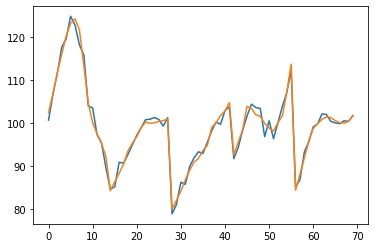

In [128]:
#Plot the results using matplotlib to visualize the relationship between the real and predicted indices
plt.plot(Y_predict_rent_prices)
plt.plot(Y_rent_prices)
plt.show()

In [129]:
#Create a full report including every coefficient, as well as a few statistical metrics.

X2 = sm.add_constant(X_rent_prices)
est = sm.OLS(Y_rent_prices, X2)
model2 = est.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:      Rent prices, s.a.   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     34.74
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           6.38e-18
Time:                        15:44:42   Log-Likelihood:                -125.82
No. Observations:                  70   AIC:                             325.6
Df Residuals:                      33   BIC:                             408.8
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

# References

- https://pandas.pydata.org/pandas-docs/stable/index.html
- https://scikit-learn.org/stable/index.html
- https://altair-viz.github.io
- https://seaborn.pydata.org/
- https://www.statsmodels.org/stable/index.html

# Thank you! 

# Feedback? 
### Feel free to send me the notebook with feedback and correction comments once you're done grading. Thank you!
thomas.henry@ieseg.fr